###  Importer les packages qu'on doit utiliser

In [ ]:
#connection de colab avec drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importer et lire les données

In [ ]:
# importer les données
df=pd.read_csv("/content/drive/MyDrive/Simple_regression_TP/Multiple_Linear_Regression_TP/Fuel_Consumption.csv")

In [ ]:
# Afficher les données 
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [ ]:
# Dimension des données 
df.shape

(1067, 4)

### Exploration des données

In [ ]:
# Décrire les données
df.describe

<bound method NDFrame.describe of       ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[1067 rows x 4 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

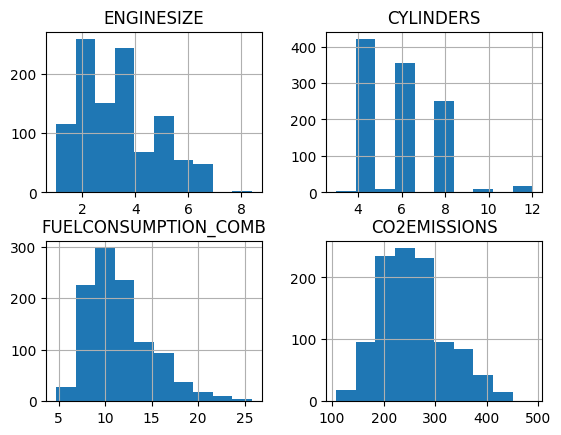

In [ ]:
# Visualiser les histogrammes des différentes variables
df.hist()
plt.show


Maintenant éssayer de visualiser ces variables en en fonction de la variable Emission, pour voir la linéarité entre elles.

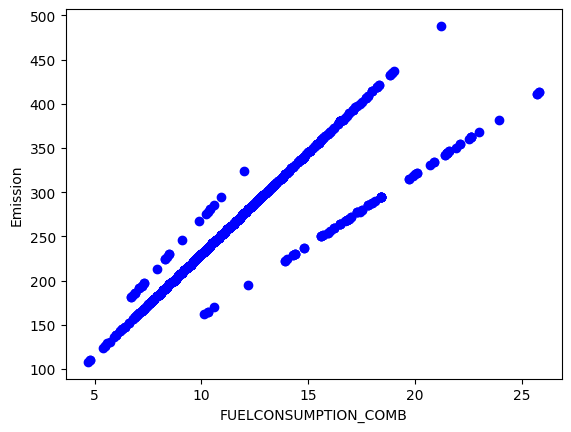

In [ ]:
# scatter plot de FUELCONSUMPTION_COMB en fonction de CO2EMISSIONS
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

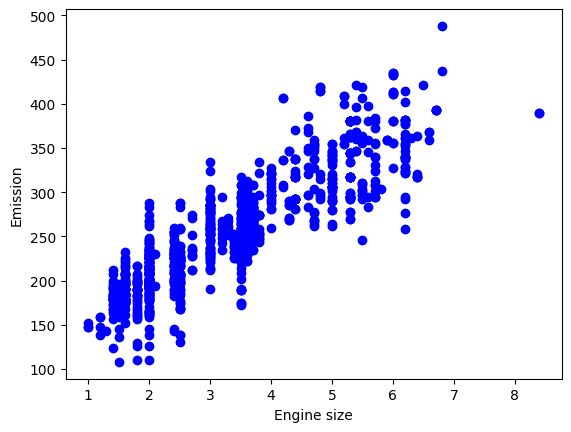

In [ ]:
# scatter plot de ENGINESIZE en fonction de CO2EMISSIONS
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

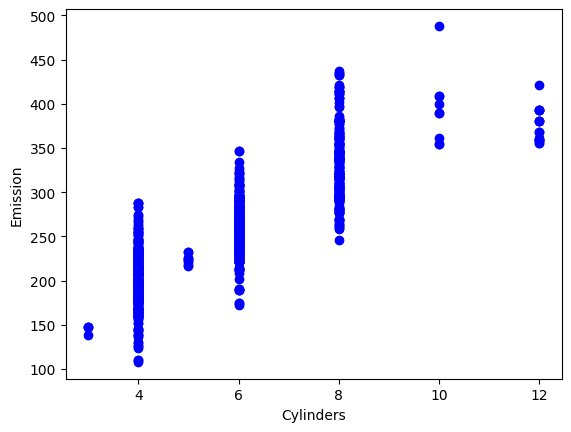

In [ ]:
# scatter plot de CYLINDERS en fonction de CO2EMISSIONS
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [ ]:
# Matrice de corrélation des variables
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


<Axes: >

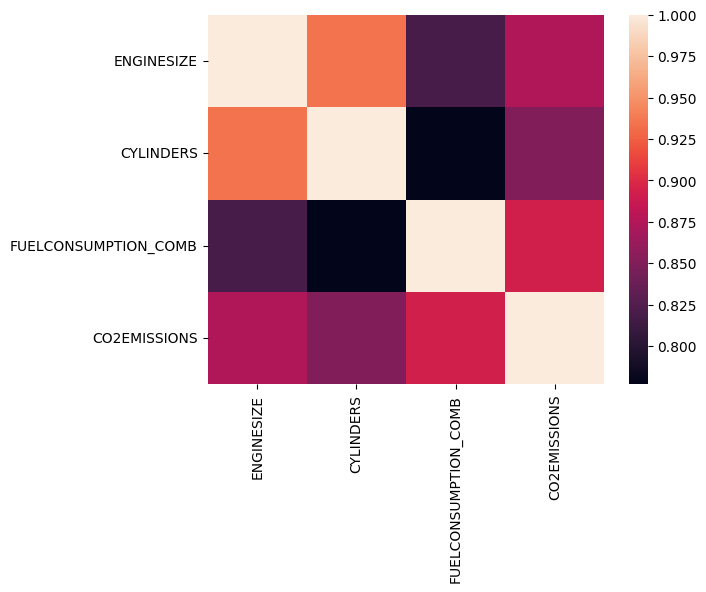

In [ ]:
import seaborn as sns 
# Heatmap de la matrice de corrélation un terme de graphe qui permet d'afficher la correlation des variable
sns.heatmap(df.corr())


### Modèle de  Régréssion Multiple

In [ ]:
df.min(),df.max() #pour voir la difference entre les varibles preducteur pour voir si on peut nomaliser ou pas

(ENGINESIZE                1.0
 CYLINDERS                 3.0
 FUELCONSUMPTION_COMB      4.7
 CO2EMISSIONS            108.0
 dtype: float64,
 ENGINESIZE                8.4
 CYLINDERS                12.0
 FUELCONSUMPTION_COMB     25.8
 CO2EMISSIONS            488.0
 dtype: float64)

In [ ]:
# Fractionner les données 
X = df.iloc[:,:3].values
y = df["CO2EMISSIONS"].values


In [ ]:
print(y)

[196 221 136 ... 271 260 294]


### Normaliser les données

In [ ]:
from sklearn.preprocessing import StandardScaler
# Objet StandardScaler
standard = StandardScaler()
# Normaliser X 
X = standard.fit_transform(X)


In [ ]:
# Fractionner les données en train et test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
# Afficher dimension des données train
X_train.shape,y_train.shape

((853, 3), (853,))

In [ ]:
# Afficher dimension des données test
X_test.shape,y_test.shape

((214, 3), (214,))

#### Modelisation


In [ ]:
# Importer le modèle 
from sklearn.linear_model import LinearRegression

In [ ]:
# Instantier le modèle 
regr = LinearRegression()
# Entrainer le modèle 
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Les coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [14.49957117 13.73244809 33.72936783]
Intercept:  255.95274560696367


In [ ]:
# Prédire la quantité de CO2 émit par l'observation 0 des données test en utilisant le coefficient (pente) et l'intercept(l'ordonnée d'origine)
Y_pred_1 = np.dot(regr.coef_,X_test[:1].T)+regr.intercept_
Y_pred_1

array([259.39421287])

In [ ]:

# Prédire la quantité de CO2 émit par l'observation 0 des données test en utilisant le coefficient (pente) et l'intercept(l'ordonnée d'origine)
Y_pred_1 =  regr.predict(X_test[:1])
Y_pred_1 

array([259.39421287])

In [ ]:
# Prédire les données test
Y_pred = regr.predict(X_test)
Y_pred

array([259.39421287, 216.04051098, 255.40887315, 261.21766954,
       294.43880893, 256.37700588, 162.45478433, 186.77091143,
       318.01242088, 261.90378029, 217.29066569, 251.25432023,
       314.30910314, 255.52168194, 205.39105093, 313.84860998,
       284.73487709, 333.21126462, 390.84799338, 251.25432023,
       231.53063469, 261.90378029, 204.70494018, 253.1905857 ,
       322.85308454, 197.64598907, 222.13132936, 264.12206773,
       186.65810264, 200.55038727, 338.05192828, 211.19984732,
       248.63194402, 189.67530963, 270.89899686, 184.72183717,
       189.67530963, 255.46527754, 332.24313189, 302.92638593,
       211.19984732, 264.80817848, 263.153935  , 227.88372135,
       334.63989052, 197.64598907, 257.23232982, 217.2342613 ,
       250.2861875 , 307.64498281, 263.2103394 , 304.84004688,
       199.86427652, 341.92445921, 319.72306876, 368.51334078,
       203.45478546, 299.03125049, 212.45000203, 209.48919944,
       214.10424552, 208.57747111, 309.34228416, 310.26

In [ ]:
# Evaluer le modèle 
from sklearn.metrics import r2_score,mean_squared_error
# Indice r2
R2_regr = r2_score(Y_pred,y_test)
R2_regr

0.869310240904918

In [ ]:
from math import sqrt
rmse_regr= sqrt(mean_squared_error(Y_pred,y_test))
rmse_regr

20.208303494761264